<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/python_ml_perfect_guide_06_dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 차원 축소
### 01 차원 축소(Dimension Reduction) 개요


차원 축소 대표적인 알고리즘인 PCA, LDA, SVD, NMF에 대해 알아보겠음.  

차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것.

### 주성분분석 PCA (Principal Component Analysis)
여러 변수간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법

In [1]:
# 붓꽃(Iris) 데이터 세트는 sepal length, sepal width, petal length, petal width 4개의 속성으로 되어 있음
# 이 4개 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인해 보겠음
from sklearn.datasets import load_iris
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

iris = load_iris()
# numpy 데이터 세트를 판다스 DF로 변환
# columns = iris.feature_names   # 이것과 아래 columns 는 같다.
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
irisdf.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


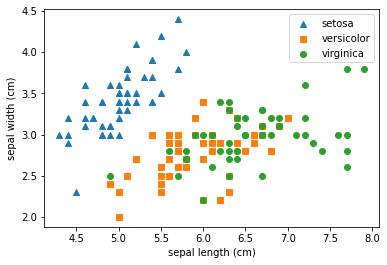

In [2]:
# 각 붓꽃 데이터 세트가 어떻게 분포되어 있는지 2차원으로 시각화
# setosa=세모, versicolor=네모 , virginica=동그라미
markers = ['^', 's', 'o']

# setosa 의 target 값은 0, versicolor은 1, virginica는 2, 각 타겟별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers) :
    x_axis_data = irisdf[irisdf['target']==i][iris.feature_names[0]]
    y_axis_data = irisdf[irisdf['target']==i][iris.feature_names[1]]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

Setosa 품종의 경우 sepal width 가 3.0 보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포되어 있음.  
Versicolor 와 virginica의 경우는 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건임을 알 수 있음.  

이제 PCA로 4개 속성을 2개로 압축한 뒤 앞의 예제와 비슷하게 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화 해 보겠음

&nbsp;  
여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변화하는 작업 필요.  
sklearn 의 StandardScaler를 이용해 평균이 0, 분산이 1인 표준 정규 분포로 iris 데이터 세트의 속성값들을 변환하겠음.


In [7]:
from sklearn.preprocessing import StandardScaler

# target 값을 제외한 모든 속성값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisdf.iloc[:, :-1])

스케일링이 적용된 데이터 세트에 PCA를 적용해 4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 PCA속성) PCA 데이터로 변환해 보겠음  
**n_components**는 PCA로 변환할 차원의 수를 의미

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

print('Shape before PCA:', iris_scaled.shape)
# fit() 과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print('Shape after PCA:', iris_pca.shape)

Shape before PCA: (150, 4)
Shape after PCA: (150, 2)


In [10]:
# iris_pca 데이터는 150 * 2 넘파이 행렬로 가지고 있음. 이를 DF 로 변환
# PCA 변환된 데이터는 칼럼 명을 각각 pca_component_1, pca_component_2 로 명명
pca_columns=['pca_component_1', 'pca_component_2']
irisdf_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisdf_pca['target'] = iris.target
irisdf_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


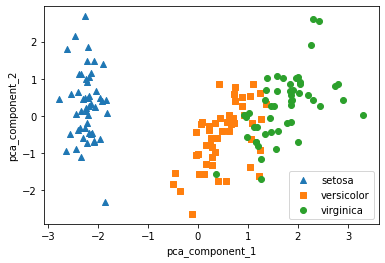

In [11]:
# 2개의 속성으로 PCA 변환된 데이터를 2차원 상에서 시각화 하겠음

# setosa=세모, versicolor=네모, virginica=동그라미
markers=['^', 's', 'o']

# pca_component_1 속성을 x축, pca_component_2 속성을 y 축
for i, marker in enumerate(markers) :
    x_axis_data = irisdf_pca[irisdf_pca['target'] == i]['pca_component_1']
    y_axis_data = irisdf_pca[irisdf_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

PCA component 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보겠음.  
PCA 변환을 수행한 PCA 객체의 explained_variance_ratio_ 속성은 전체 변동성에서  
개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공하고 있음

In [12]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


**pca_component_1**이 전체 변동성의 72.9%, 
